In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynascale.utils.lds import plot
from dynascale.challenges.lds import LDSChallenge
from dynascale.baselines.simple import Simple
from dynascale.tasks import FixedTrainSize
import numpy as np
import scipy as sp

2023-05-16 16:22:46.766479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0.8567712317502619
True
5.101685528517422


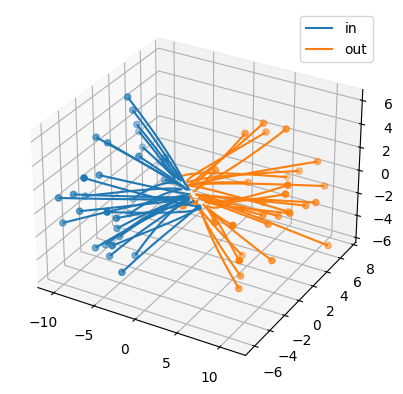

In [3]:
latent_dim = 3
embed_dim = 4
n = 5000
timesteps = 50
challenge = LDSChallenge(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, timesteps=timesteps)
y = challenge.make_data(y0, timesteps=timesteps)
plot([x, y], target_dim=3, labels=["in", "out"], max_lines=30)

print(np.linalg.norm(challenge.C, 2))
print(np.all(np.linalg.eigvals(challenge.A) < 0))
print(np.linalg.norm(challenge.A, 2))

In [4]:
model = Simple(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=20)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

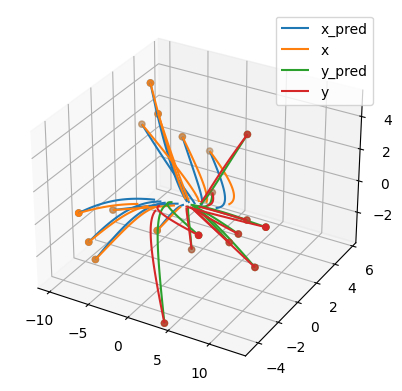

In [5]:
x_pred = model.predict(x[:, 0], 50)
y_pred = model.predict(y[:, 0], 50)
plot([x_pred, x, y_pred, y], target_dim=3, labels=["x_pred", "x", "y_pred", "y"], max_lines=10)

In [7]:
task = FixedTrainSize(n=5000, L=[2, 3, 4], E=[4], T=[50], C=[0], control_horizons=1, test_examples=10, reps=3,
                      test_timesteps=50, challenge_cls=LDSChallenge)
data = task.evaluate(model_cls=Simple, fit_kwargs={"epochs": 5})

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 